<a href="https://colab.research.google.com/github/mm002a/JupyterNotebooks-V0.0/blob/main/DeclineCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pytexit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from pytexit import py2tex

In [13]:
#Just testing pytexit:py2tex()
py2tex('Tot_prod = (1-pow(1+b*d_init*T,(b/(1-b))))*q_init/(d_init*(1-b))')

<IPython.core.display.Latex object>

$$Tot_{prod}=\frac{\left(1-\left(1+b d_{init} T\right)^{\frac{b}{1-b}}\right) q_{init}}{d_{init} \left(1-b\right)}$$


'$$Tot_{prod}=\\frac{\\left(1-\\left(1+b d_{init} T\\right)^{\\frac{b}{1-b}}\\right) q_{init}}{d_{init} \\left(1-b\\right)}$$'

#Production decline curves

## Introduction
Over the life of an oil and gas well the production decreases as the well depressurises. Arps[^1] (1945) suggests the following empirical formula:
\begin{align}
D(t) = Cq(t)^n = - \frac{1}{q}\frac{dq}{dt} = -b q^d 
~~~~~~~~~~~~~~\text{ where: }C>0 \text{ and } 0\leq n \leq 1
\end{align}
where $q(t)$ is the flow rate and $C$ and $n$ are model constants and $q_0 = q(0)$ is the initial flow rate.

| Parameter ($n$)     | Decline Type | Flow rate: $q(t)~~~~~~~~~~~$ | $N$| H5 |
|-----------|----|:--------------------------:|:-------------------:|----|
| V1        | V2 | V3 | V4 | V5|
| $n=0$     | Exponential | $q_0\exp^{-Ct}$ | V4 | V5|
| $0<n<1$ | Hyperbolic  | $\frac{q_0}{(1+CDt)^{\frac{1}{b}}}$| V4 | V5|
| $n=1$   | Harmonic    | $q_0(1+CDt)^{-\frac{1}{C}}$| V4 | V5|
| d=1   | Harmonic    | V3 | V4 | V5|
| d=1   | Harmonic    |  mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm  | V4 | V5|



fdg


## Model identification
`Assume we never find UcomS.exe`  
Sort out the table above.
Define a function $\cal{F}(q)$ by:
\begin{align}
\cal{F}(q) := \frac{1}{q}\frac{dq}{dt}(q)
\end{align}
Obviously the differential equation above says that:
\begin{align}
\cal{F}(q) = -b q^d 
\begin{cases}
d = 0 & \implies \cal{F}(q) \text{ is constant} \\
0<d<1 & \implies \cal{F}(q) \text{ is less than the $d=1$ case, see graph } \\
d = 1 & \implies \cal{F}(q) \text{ is linear (in $q$)} \\
\end{cases}
\end{align}

Procedure:  
1.  Possibly use a reduced interval (throw away start-up effects).
1.  Use a moving average to eliminate noise.
1.  Analyse $\cal{F}(q)$ over a suitable interval.

###References
0.   Search `github.com` "decline curve analysis" : 41 hits!
1.   J.J. Arps, **Analysis of Decline Curves** *Trans. 160 (01): Pp 228–247. Paper Number: SPE-945228-G* (1945)  
https://doi.org/10.2118/945228-G
2.   J.J. Arps, **Estimation of Primary Oil Reserves**, *Trans AIME, 207(01) Pp 182-191* (1956)  
https://doi.org/10.2118/627-G
3. Guo,Boyun; Lyons, Willam C.; and Ghalambor, Ali;  **Petroleum Production Engineering --- A Computer-Assisted Approach**, 
Elsevier, 2007
4. Gregory King, **4.4.1.4: Pseudo Steady-State Flow of Oil to a Vertical Production well**
URL https://www.e-education.psu.edu/png301/node/854)
5. Brandon Nutall, **Predicting Cumulative Production of Devonian Shale Gas Wells from Early Well Performance Data, Appalachian Basin of Eastern Kentucky**, Kentucky Geological Survey, Meeting (2007)
     - https://www.searchanddiscovery.com/abstracts/pdf/2007/eastern_section/abstracts/ndx_nuttall.pdf
     - https://www.uky.edu/KGS/emsweb/devsh/production/decline_obj.py (Python Code)
6. Andrew Allen; **COMBINING MACHINE LEARNING AND EMPIRICAL ENGINEERING METHODS TOWARDS IMPROVING OIL PRODUCTION FORECASTING**, *California Polytechnic State University*, (2020)
   -   https://digitalcommons.calpoly.edu/cgi/viewcontent.cgi?article=3691&context=theses
   -   https://github.com/andrewjeffallen/arpsdca (Python Repository: Arps + Machine Learning)
7. **aRpsDCA - an R package for Arps decline-curve analysis**
      - https://www.rdocumentation.org/packages/aRpsDCA/versions/1.1.1
8. Python code + examples. https://trainingpython.z19.web.core.windows.net/Execise3.html
9. Also see: https://petrowiki.spe.org/Types_of_decline_analysis_in_production_forecasting

Do the graph


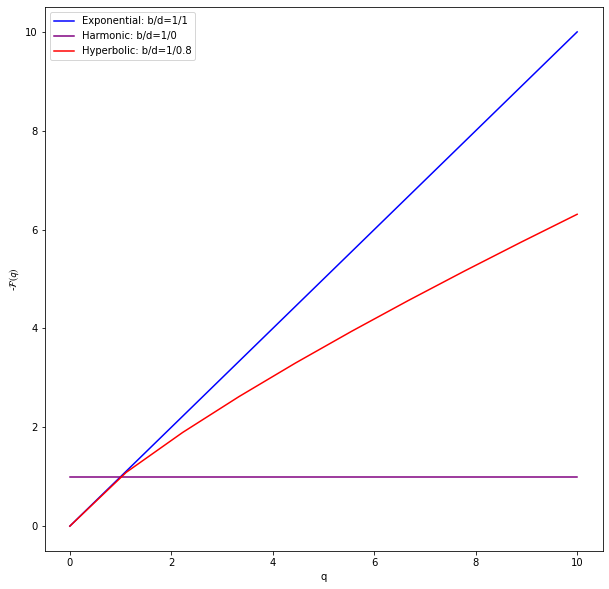

Agreeing with Guo et al. Fig 8.4


In [14]:
print("Do the graph")
import numpy as np
import matplotlib.pyplot as plt
#For large graphs
plt.rcParams["figure.figsize"] = (10,10)
b = 1
d = 1
q = np.linspace(0,10,10)
F = b*pow(q,d)
plt.plot(q,F,color='blue',label="Exponential: b/d=1/1")
d = 0
F = b*pow(q,d)
plt.plot(q,F,color='purple',label="Harmonic: b/d=1/0")
d = 0.8
F = b*pow(q,d)
plt.plot(q,F,color='red',label="Hyperbolic: b/d=1/0.8")
plt.xlabel('q')
plt.ylabel('-$\cal{F}(q)$')
plt.legend()
plt.show()
print("Agreeing with Guo et al. Fig 8.4")
#


In [15]:
#Exponential decline
import math
def Tot_prod_exp (q_init=1,d_init=0.1,b=0,T=10):
  """
  Compute the total production for a well with an exponential decline curve
  Tot_prod_exp (q_init=1,d_init=0.1,b=0,T=10)
  q_init: the initial production, d_init: the initial decline rate, 
  b: dummy variable, T: the time period
  """
  print("Exponential decline:")
  Tot_prod = -q_init*(1-pow((1-d_init),T))/math.log(1-d_init)
  print("q_init: ",q_init,"d_init: ",d_init," b: ",b," Time: ",T)
  return Tot_prod
def Tot_prod_hyper (q_init=1,d_init=0.1,b=0.5,T=10):
  """
  Compute the total production for a well with a hyperbolic decline curve
  Tot_prod_exp (q_init=1,d_init=0.1,b=0.5,T=10)
  q_init: the initial production, d_init: the initial decline rate, 
  b: model parameter (0->exponential, 1->harmonic), T: the time period
  """
  print("Hyperbolic decline:")
  print("1+bd")
  Tot_prod = (1-pow(1+b*d_init*T,(b/(1-b))))*q_init/(d_init*(1-b))
  print("q_init: ",q_init,"d_init: ",d_init," b: ",b," T: ",T)
  return Tot_prod
print("Test of log10: ",math.log10(10)," e: ",math.e," ln: ",math.log(math.e))
print("Tot Prod(exponential decline): ",Tot_prod_exp(T=12))
print("Tot Prod(hyperbolic decline): ",Tot_prod_hyper(T=12))

Test of log10:  1.0  e:  2.718281828459045  ln:  1.0
Exponential decline:
q_init:  1 d_init:  0.1  b:  0  Time:  12
Tot Prod(exponential decline):  6.810620269261164
Hyperbolic decline:
1+bd
q_init:  1 d_init:  0.1  b:  0.5  T:  12
Tot Prod(hyperbolic decline):  -12.000000000000002


q:  [904.84, 818.73, 740.82, 670.32, 606.53, 548.81, 496.59, 449.33, 406.57, 367.88, 332.87, 301.19, 272.53, 246.6, 223.13, 201.9, 182.68, 165.3, 149.57, 135.34, 122.46, 110.8, 100.26, 90.72]


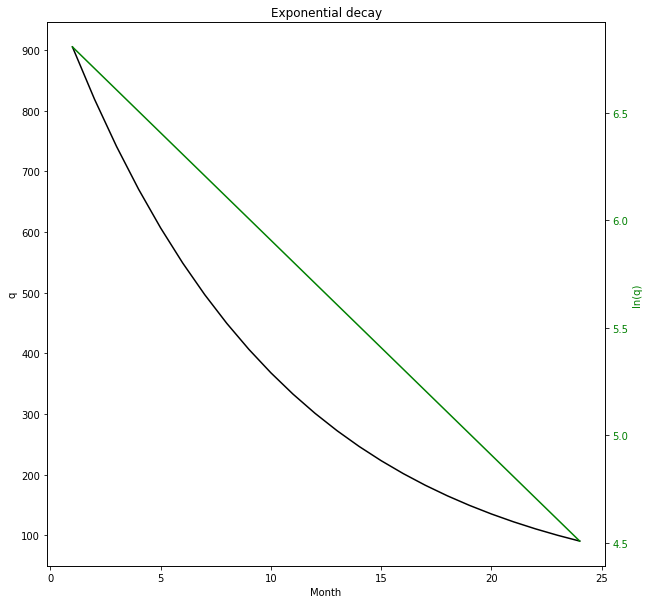

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#Chapter 8 Buoyun Guo et al
#Exponential decay Table 8-1 from https://faculty.ksu.edu.sa/sites/default/files/Production Decline Analysis.pdf
q = [904.84, 818.73, 740.82, 670.32, 606.53, 548.81, 496.59, 449.33, 406.57, 367.88, 332.87, 301.19, 272.53, 246.60, 223.13,
     201.90, 182.68, 165.30, 149.57, 135.34, 122.46, 110.80, 100.26, 90.72]
print("q: ",q)
x = list(range(1,25))
#https://pythonguides.com/matplotlib-two-y-axes/
fig, ax1 = plt.subplots() 

ax1.set_title('Exponential decay')  
ax1.set_xlabel('Month') 
ax1.set_ylabel('q', color = 'black') 
plot_1 = ax1.plot(x, q, color = 'black') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('ln(q)', color = 'green') 
plot_2 = ax2.plot(x, np.log(q), color = 'green') 
ax2.tick_params(axis ='y', labelcolor = 'green') 

# Show plot

plt.show()
#


Exponent d:  1.5  xt:  [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8]
Dq:  [0.00117848 0.00124145 0.00126142 0.00127138 0.00126955 0.00131117
 0.00135031 0.0013202  0.00141314 0.00136395 0.00145506 0.00138215
 0.00146838 0.00146468 0.00145095 0.00153592 0.00151174 0.00159773
 0.00156067 0.00150906 0.00158636 0.00166932 0.00159862 0.00167767
 0.00158607 0.00184367 0.0015523  0.00182064 0.00169745 0.00177239
 0.00162053 0.00192589 0.00176353 0.00183635 0.0016401  0.00198319
 0.00177355]
Exponent d:  1.45  xt:  [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8]
Dq:  [0.00131742 0.00138546 0.00140535 0.00141413 0.00140988 0.00145392
 0.00149511 0.00145964 0.00156028 0.00150387 0.00160224 0.00151994
 0.00161281 0.00160675 0.0015898  0.00168099 0.0016526  0.00174466
 0.00170227 0.00164422 

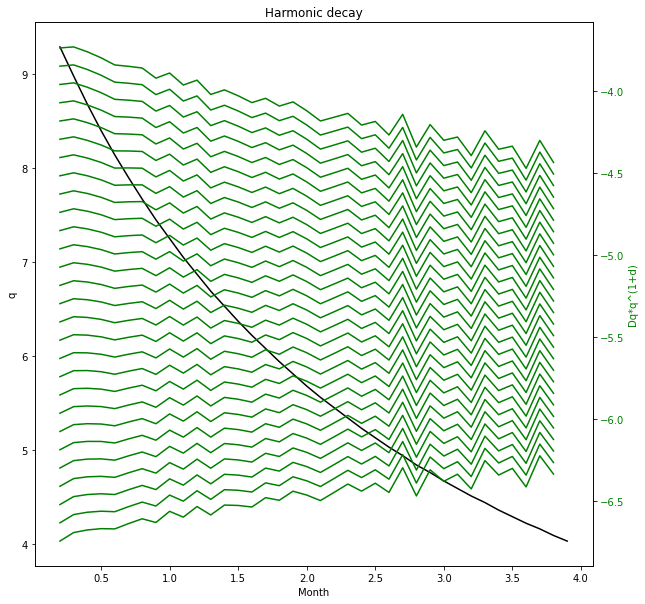

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from array import array
#Harmonic decay Table 8-2 from https://faculty.ksu.edu.sa/sites/default/files/Production Decline Analysis.pdf
#Just typing data!q = [9.29, 0.30, 8.98, 0.40, 8.68, 0.50, 8.40, 0.60, 8.14, 0.70, 7.90, 0.80, 7.67, 0.90, 7.45, 1.00, 7.25, 1.10, 7.05, 1.20, 6.87, 1.30, 6.69, 1.40, 6.53, 
#     1.50, 6.37, 1.60, 6.22, 1.70, 6.08, 1.80, 5.94, 1.90, 5.81, 2.00, 5.68,
#     2.10, 5.56, 2.20, 5.45, 2.30, 5.34, 2.40, 5.23, 2.50, 5.13, 2.60, 5.03, 2.70, 4.94, 2.80, 4.84]
#print("q: ",q)
#q1 = q[0:54:2]
#print("q1: ",q1)
#q2 =[4.76, 4.67, 4.59, 4.51, 4.44, 4.36, 4.29, 4.22, 4.16, 4.09, 4.03]
#qall = np.append(q1,q2)
#print("qall: ",qall)
#
qall = [9.29, 8.98, 8.68, 8.4, 8.14, 7.9, 7.67, 7.45, 7.25, 7.05, 6.87, 6.69, 6.53, 6.37, 6.22, 6.08, 5.94, 5.81, 5.68,
        5.56, 5.45, 5.34, 5.23, 5.13, 5.03, 4.94, 4.84, 4.76, 4.67, 4.59, 4.51, 4.44, 4.36, 4.29, 4.22, 4.16, 4.09, 4.03]
x = np.arange(0.2, 4.0, 0.1)
#print("x: ",x)
#https://pythonguides.com/matplotlib-two-y-axes/
fig, ax1 = plt.subplots() 

ax1.set_title('Harmonic decay')  
ax1.set_xlabel('Month') 
ax1.set_ylabel('q', color = 'black') 
plot_1 = ax1.plot(x, qall, color = 'black') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Dq*q^(1+d)', color = 'green') 
#
xt = np.arange(0.2, 3.9, 0.1)
d=1.0
dindex = np.arange(1.5, 0.1, -0.05)
for d in dindex:
  print("Exponent d: ",d," xt: ",xt)
  Dq = np.zeros(37)
  for i in range(37):
    Dq[i] = (qall[i]-qall[i+1])/(pow(qall[i],1+d))
  print("Dq: ", Dq)
#
  plot_2 = ax2.plot(xt, np.log(Dq), color = 'green') 
  ax2.tick_params(axis ='y', labelcolor = 'green') 

# Show plot

plt.show()
#


In [18]:
# Decline Object
#
# Purpose:
#
#   To find the best fit hyperbolic or exponential decline parameters
#   to model rate/time production data.
#
# 9-May-2007
#
# Programming language: Python 2.4.4 (26-Sep-2012 EPD 2.7.2)
# Updated to Python 3, Anaconda distribution (3-May-2017)
#
# Implementation by
#   Brandon Nuttall
#   Retired from:
#       Kentucky Geological Survey
#       University of Kentucky
#   Contact:
#   bcnuttall@gmail.com
#
# Originally developed with funding from the USGS, National Coal Resources
# Data System for data reduction and analysis
#
# Project name:
#
# Predicting Production of Devonian Shale Gas Wells from Early Well
# Performance Data, Appalachian Basin of Eastern Kentucky
#
#--------------------------------------------------------------------------
# DISCLAIMER:
#
# This module is provided as is with no warranty either express or implied
# by the Kentucky Geological Survey, the University of Kentucky, or the
# United States Geological Survey. This program is not intended to be used
# for the economic analysis and projection of future performance of individual
# wells. Such use has not been vetted and is at the sole discretion of the
# user who assumes all liability.
#--------------------------------------------------------------------------
#
# Python is an open source, object oriented, interactive, cross platform,
# scripting language with extensive libraries for data analysis and
# plotting. Python, SciPy, and components are used and distributed under
# GNU or BSD public licenses (which see).
#
# Resources:
#   Python: www.python.org (core language resources)
#   SciPy and NumPy: www.scipy.org (scientific, numerical, and plotting)
#   Enthought: www.enthought.com (comprehensive Windows distribution of
#       Python bundled with SciPy, NumPy, and many others) -- original
#   Anaconda: www.anaconda.com (Windows distribution of collected Python
#       packages and environments including Jupyter notebooks) -- current
#       development environment
#
# Revisions:
#   3-May-2007 -- fixed handling of key word arguments (kwargs) to specify
#       bounds in call to instances of DeclineObj
#   4-May-2007 -- set x_best to a continuous series [0,1,2, ..., x.max()]
#       to make data continuous over shut-in periods (i.e., production=0)
#   9-May-2007 -- After initial runs, a significant number of hyperbolic
#       declines were noted to have converged on the maximum b (5) and
#       minimum di (-1). These limits were changed to max b = 10 and min
#       di = -2.
#   26-Sep-2012 -- Updated call to fmin_tnc to comply with implementation
#       of the function in Enthought Python 2.7.2 distribution
#   19-Dec-2014 -- Update documentation
#   13-Feb-2018 -- Updated doc strings so doctest has no failures

import numpy as np
from scipy.optimize import fmin_tnc
from scipy import stats

# Global constants
MIN_b = 0.0001 # Minimum hyperbolic decline exponent, b
MAX_b = 10.0 # Maximum hyperbolic decline exponent, b
MIN_di = -2.0 # Set lower limit for decline rate

class DeclineObj:
    """Find best fit (hyperbolic or exponential) to rate-time data

    Purpose:
        Find the hyperbolic or exponential decline parameters, qi, b, and di
        that represent a best fit to input oil or gas production rate and
        time data.

            Arps equation:
                (hyperbolic)  qt = qi*(1-b*di*t)**(-1.0/b) [general eq]
                (exponential) qt = qi*e(di*t) [case where b=0]
                When b=1 general hyperbolic case reduces to harmonic

        qi = initial production (i.e., projected rate at the y-intercept)
            rate and time are expressed using the same interval
                volume/day for time in days, volume/month for time in months,
                etc.
                
            Note that rates may be actual observed rates or may be
            "dimensionless." Dimensionless rate values range from 0 to 1 and
            are found by dividing the rates by the maximum observed rate.
            Depending on the calculated best fit, the calculated qi value
            may exceed 1.
                
        b  = decline exponent
            b>0.0 (if b=0, use exponential decline)
            
                 MIN_b = 0.0001, a global constant, if calculated b
                 equals MIN_b, then suspect exponential decline. MIN_b
                 is used to set constraints limits for determining hyperbolic
                 decline parameters
                 
            b=1.0 (same as harmonic decline, not separately implemented in this
                version)
                
            1.0<b<MAX_b -- Many long-term, "flat" production histories have a 
                decline exponent > 1. This seems especially true of 
                low-permeabiliy shale reservoirs. 
            
        di = initial (nominal) decline rate (i.e., slope of least squares
            best fit), input as decimal fraction, MIN_di <= di <= 1.0

            NB:
            "Decline" is assumed by this routine in the mathematical sense
            of a decrease in slope, thus the sign of the decline rate is
            negative. And,
                MIN_di < di <= 0.0 production declines (usual case)
                    common petroleum industry routines for decline analysis
                    report this case as a positive numeric percent (this
                    program yields -0.25, industry yields 25%)
                0.0 < di <= 1.0 production inclines (unconventional and
                    low permeability reservoirs)
                As abs(di) approachs 0, the significance of the slope
                    also approachs 0. That is, there is no correlation;
                    the slope of the model is statistically zero.
                    
    Composit decline models (that is, initially hyperbolic followed by
    exponential after reaching a particular decline rate or other) are not
    considered or implemented in these routines.

    Usage: (declaration and initialization of an instance of DeclineObj)

        Note that all rate/time data are pre-processed outside of this
        module. That is, any smoothing or scaling are done elsewhere.

        well = DeclineObj(x,y,parameter_list,model)

        where:
            x = numpy-like array of time period data (float), these data must
                increase that is, for any time period T(t):

                    T(1) < T(t) < T(n) and
                    T(t-1) < T(t) < T(t+1)

                    x = array([0.0, 1.0, 2.0, ...]), or
                    x = array([1.0, 2.0, 3.0, ...]) useful for log-log plots

                    time periods may be missing (shut-in, etc)

                    x = array([0.0, 1.0, 2.0, 5.0, 6.0, ...])
                    
                    Time intervals match the interval for the reported
                    production data. If monthly production data are used,
                    then time is also in months.
                    
            y = numpy-like array of production rate data (float)
                (at time x[1], production rate is y[1], note also
                that numpy array indices (any Python lists, etc.)
                begin at 0)
                
                Note that time and rate are expressed in the same units
                    time in days then rate is volume per day, etc.
                
            parameter_list = (optional) initial list of parameters
                to hyperbolic decline in order: [qi, b, di]. If model
                is forced to exponential, b is set to 0

            model = (optional) Force computation to use a particular model
                model=None : (default) find the model with the best fit
                model='EXP': force exponential
                model='HYP': force hyperbolic

            method = (optional) specify which scipy.optimize method to use
                method='TNC' (default) This is a constrained model meaning
                    boundary conditions are assumed for each of the inputs:
                        0<=qi<=5*max(production rate)
                        0<b<=MAX_b (for hyperbolic b<>0)
                        MIN_di<=di<=1
                    see scipy.optimize.fmin_tnc()
                method='LSQ' This performs a least squares best fit using
                    scipy.optimize.leastsq() because this model is not
                    constrained, it may be that it will fit production
                    data that increases (inclines) over time better than 
                    fmin_tnc()

        After creating and initializing the instance, use 

            results = well() # use defaults

            To calculate and return the decline parameters. The
            parameter, di, is retured in the mathematical sense: negative
            values are declines, positive values are inclines.

            Ranges for the parameters qi, b, and di can be set by using
            the following form of the call:

            results = well(limits=[(qi_min,qi_max),(b_min,b_max),(di_min,di_max)])

            This type of call can be used to implement "industry rules-of-thumb"
            for the parameters. See example 3 (following) for an example.

    After execution, the declared DeclineObj has defined instances:
        obj.success = 1 then OK, else is an error code returned by
            the fmin_tnc() method

            from scipy.optimize.tnc.py:
            
            EINVAL       = -2 # Invalid parameters (n<1)
            INFEASIBLE   = -1 # Infeasible (low > up)
            LOCALMINIMUM =  0 # Local minima reach (|pg| ~= 0)
            CONVERGED    =  1 # Converged (|f_n-f_(n-1)| ~= 0)
            MAXFUN       =  2 # Max. number of function evaluations reach
            LSFAIL       =  3 # Linear search failed
            CONSTANT     =  4 # All lower bounds are equal to the upper bounds
            NOPROGRESS   =  5 # Unable to progress
            USERABORT    =  6 # User requested end of minimization

            For exponential fit using linregress(), obj.success=None
            
        obj.parameters = list of results, [qi, b, di] or [qi, di] as a NumPy array
            (this is what is returned by calls to the object)
        obj.r2 = the square of the correlation coefficient
        obj.x_best = NumPy array of x values corresponding to obj.y_best
        obj.y_best = NumPy array of calculated, best fit, rate data
            The x, y, and x_best, y_best arrays can be passed to plot routines for
            graphic output. Note that if the obj._find_best() method is used, x_best
            and y_best represent an optimum solution.
        obj.used = 'HYP' or 'EXP' to indicate which model was used in the calculations
        obj.offset = None (if obj._find_best() is not called) or the index of the
            offset from 0 of the optimum best fit solution

    Returns:
        results -- a tuple with three elements
            results[0] = 'EXP' or 'HYP' (see also obj.used)
            results[1] = parameter list
                for hyperbolic, returns three parameters:
                    results[1][0] = qi
                    results[1][1] = b
                    results[1][-1] = di (last item)
                for exponential, returns two parameters:
                    results[1][0] = qi
                    results[1][-1] = di (last item)
            results[-1] = correlation coefficient, r2

    Additional methods defined:

        _find_best(x,y,nperiods=12)
            This method iterates through the first n periods (specified by
            nperiods) of data and finds an optimum best fit. The arguments and
            keyword arguments are optional. Both x and y must be specified if
            supplied, the default is the original x and y set when the object
            was declared. If nperiods is not suppled, the method basically defaults
            to iterating over the first 12 periods as long as that will leave at
            least 12 periods of data for input to the fitting calculations.

            This method returns results (the tuple as earlier defined)
            This method sets obj.offset

        _print_str()
            This method returns a text string supplying the best fit equation
            and correlation coefficient

    Sample usage and calls:

        ------------------------------------------------------------------
        Some of these document tests may fail because of differences in
        the representation of real numbers especially beyond the first few
        significant digits. These failures can be safely ignored.
        
        Outputs were updated so that as of 13-Feb-2018, the doc tests all
        succeed
        ------------------------------------------------------------------

        Test using generated rate/time data for a perfect fit. The generated
        data are similar to rate data processed to scale the input with
        respect to the maximum rate of production, that is, the rate data
        are expressed as a percentage of the maximum production rate.

        Example 1: Generate 5 years (=60 periods) of dimensionless rate data
            and get a best fit of those data. Correlation should be 1
            (perfect).

        >>> def hyp_func(p,x): # define the hyperbolic decline equation
        ...    return p[0]*(1.0-p[1]*p[2]*x)**(-1.0/p[1])
        >>> x = np.arange(60) # initialize array of time data
        >>> qi = 1.25 # initial production rate
        >>> b = 0.75 # decline exponent
        >>> di = -0.25 # initial/nominal decline rate
        >>> y = hyp_func([qi,b,di],x) # generate rate data
        >>> ex1 = DeclineObj(x,y)
        >>> results = ex1()
        >>> print(results)
        ('HYP', [1.2501809269171351, 0.75034238085330163, -0.25014906355939359], 0.99999997862373802)
        >>> qi, b, di = ex1.parameters
        >>> print("qi = %8.2f, b = %5.3f, di=%5.2f%%" % (qi,b,abs(di)*100))
        qi =     1.25, b = 0.750, di=25.01%
        >>> print(ex1._print_str())
        HYP: qt =     1.25*(1.0 - 0.750*(-0.250)*t)**(-1.0 / 0.750)
        r2=1.0000

        Example 2: Same x data, qi, and di, but exponential model
            should be recognized
            
        >>> y = qi*np.exp(di*x)
        >>> ex2 = DeclineObj(x,y)
        >>> results = ex2()
        >>> print(ex2._print_str())
        EXP: qt =     1.25*np.exp(-0.250*t)
        r2=1.0000
        
        (Note that the calculated r2 = 1.0, perfect correlation

        Example 3: 

        Test using real production data. Note that these data are rate
        time data pairs similar to what might be expected from processing
        a comma separated values (*.csv) file or by connecting to an
        external data base. These data pairs must be converted into separate
        x and y data arrays (numpy array type).
        
        In this case, the rate is thousand cubic feet of gas per month
            (Mcf/mo) and time is months

        >>> rn115604=[[0, 3233], [1, 3530], [2, 3152], [3, 2088], [5, 3038],
        ...    [6, 2108], [7, 2132], [8, 1654], [9, 1762], [10, 1967],
        ...    [11, 1760], [12, 1649], [13, 1633], [14, 1680], [15, 1398],
        ...    [16, 1622], [17, 1393], [18, 1436], [19, 1352], [20, 1402],
        ...    [21, 1459], [22, 1373], [23, 1262], [24, 1346], [25, 1325],
        ...    [26, 1319], [27, 1309], [28, 1206], [29, 1249], [30, 1446],
        ...    [31, 1255], [32, 1227], [33, 1268], [34, 1233], [35, 1175],
        ...    [36, 1129], [37, 1242], [38, 1247], [39, 1198], [40, 1058],
        ...    [41, 1172], [42, 1242], [43, 1214], [44, 1148], [45, 1689],
        ...    [46, 971], [47, 1084], [48, 1028], [49, 1164], [50, 1297],
        ...    [51, 1040], [52, 1045], [53, 1196], [54, 991], [55, 1065],
        ...    [56, 898], [57, 1020], [58, 966], [59, 1162], [60, 1069],
        ...    [61, 1055], [62, 1035], [63, 1045], [64, 1076], [65, 1108],
        ...    [66, 918], [67, 1051], [68, 1049], [69, 1039], [70, 1133],
        ...    [71, 887], [72, 924], [73, 983], [74, 1077], [75, 1092],
        ...    [76, 973], [77, 920], [78, 1040]]
        >>> xy = np.array(rn115604,dtype=float)
        >>> x = xy[:,0]
        >>> y = xy[:,1]
        >>> ex3 = DeclineObj(x,y,[y.max(),3.5,-0.75])
        >>> results = ex3(limits=[(0,y.max()*10.0),(1.0,4.0),(-0.99,-0.001)])
        >>> print(ex3._print_str())
        HYP: qt =  3555.40*(1.0 - 2.758*(-0.180)*t)**(-1.0 / 2.758)
        r2=0.8802

        Sample commands to plot the output (not run with standard doctest)
        
        import pylab
        qi, b, di = results[1]
        title = 'Recno 115604: qi=%7.1f, b=%7.3f, di=%8.4f, r2=%8.4f' % (qi, b, di, results[-1])
        pylab.semilogy(x,y,'ro:',ex3.x_best,ex3.y_best,'b--')
        pylab.xlabel('Time (months)')
        pylab.ylabel('Rate (Mcf)')
        pylab.legend(['Data','Best fit'])
        pylab.grid(True)
        pylab.title(title)
        pylab.show()

        Check error detection with generated data

        >>> x = np.array([1.0, 10.0, 20.0, 30.0, 40.0])
        >>> y = np.array([ 0.87474445,  0.7194309 ,
        ...    0.60668881,  0.52160525,  0.45541123])
        >>> # qi can't be negative
        >>> ex3 = DeclineObj(x,y,[-1.0,0.5,0.25])
        Traceback (most recent call last):
            ...
        ValueError: qi must be > 0
        >>> # b can't be 0 (use exponential model if suspect b=0
        >>> # or if b is very small)
        >>> ex3 = DeclineObj(x,y,[1.1,0.0,0.25])
        Traceback (most recent call last):
            ...
        ValueError: Decline exponent, b, = 0, use exponential
        >>> # b can't be negative
        >>> ex3 = DeclineObj(x,y,[1.1,-1.0,0.25])
        Traceback (most recent call last):
            ...
        ValueError: Decline exponent, b, out of range
        >>> # in actual practice, it is very unlikely that b
        >>> # could ever be more than 5.0
        >>> ex3 = DeclineObj(x,y,[1.1,6.0,0.25])
        Traceback (most recent call last):
            ...
        ValueError: Decline exponent, b, out of range

        References:
        
        Fetkovich, M.J., Fetkovich, E.J., and Fetkovich, M.D., 1996,
            Useful Concepts for Decline-Curve Forecasting, Reserve
            Estimation, and Analysis: SPE Reservoir Engineering,
            February 1996, p. 13-22.
        Jones, E., Oliphant, T., Peterson, P. and others, 2001,
            SciPy (http://www.scipy.org/SciPy): Open Source
            Scientific Tools for Python.
        Martelli, A., Ravenscroft, A. M.,and Ascher, D., 2005,
            Python Cookbook: Recipes from the Python Community:
            Sebastopol, California, O'Reilly, 807 p.
        van Rossum, G., and others, 1991, The Python Programming Language,
            Open Source Object-oriented programming: Python Software
            Foundation, web page URL http://www.python.org/.

    """
    def __init__(self,x,y,guess=None,model=None):
        """Initialize instance and check input"""
        self.x = x
        self.y = y
        self.offset = None
        self.x_best = None
        self.y_best = None
        self.used = None
        self.success = None
        self.parameters = None
        if guess==None:
            self.guess = [y.max(),1.0,-0.5]
        else:
            # check the input for problems
            qi, b, di = guess
            if qi <= 0.0:
                raise ValueError("qi must be > 0")
            if b==0.0:
                raise ValueError("Decline exponent, b, = 0, use exponential")
            if b<0.0 or b>5.0:
                raise ValueError("Decline exponent, b, out of range")
            if abs(di)>1.0:
                di = di/100.0
            if di<-1.0 or di>1.0:
                raise ValueError("Decline rate, di, out of range")
            if di>0:
                # assume user input the decline rate in the
                # commonly used sense of negative slope, i.e., declining rate
                di *= -1.0
            self.guess = [qi, b, di]
        self.model = None # set default model
        if model is not None:
            if model.upper() in ['EXP','HYP']:
                self.model=model.upper()
            else:
                raise ValueError("Model specified is not 'EXP' or 'HYP'")

    def __call__(self,*args,**kwargs):
        """Do optimization and find best fit parameters

        *args -- an optional list [x_values, y_values]
            if not supplied, use self.x and self.y
        **kwargs -- bounds (default=None else a list)

        If bounds are specified, they are a list of pairs, one pair for
        each of the three parameters:
             [[qi.min, qi.max], [b.min, b.max], [di.min, di.max]]

        fmin_tnc() is a constrained optimization routine used to determine
            the best fit for the hyperbolic model. The default
            boundaries (constraints) if not specified are:
                qi, initial production -- 0 <= qi <= y.max() * 10
                b, decline exponent -- 0.0001 <= b <= 5
                di, nominal decline -- -1 <= di <= 1

            for small b, suspect decline is exponential

        linregress() is a standard linear regression routine that is
            used to determine the best fit for the exponential model.
            A linear best fit is found for time vs the natural log
            of the rate data.

        Two different models are provided because as the hyperbolic
        decline exponent, b, approaches zero, the model simplifies
        to the exponential model. For the hyperbolic model, cases where
        b = 0 are undefined.

        """

        # Minimization functions don't need to be exposed
        def hyperr_TNC(p, y, x):
            """Error function for fmin_tnc() (hyperbolic)"""
            err = y - self.hypfunc(p, x)
            return np.dot(err,err)

        # if args are specified, use those for x and y else use self
        if args:
            x, y = args
        else:
            x = self.x
            y = self.y
        if kwargs:
            if "limits" in kwargs:
                limits = kwargs["limits"]
            else:
                limits = None
        else:
            limits = None
        if limits == None:
            # set default bounds
            limits = [(0,y.max()*5.0),(MIN_b,MAX_b),(MIN_di,1.0)]
        # do the hyperbolic decline
        hyp_parameters, nfeval, hyp_success = fmin_tnc(hyperr_TNC,
            self.guess, args=(y, x), fprime=None, bounds=limits,
            maxfun=2000, approx_grad=True)
        hyp_r2 = self._r2(x,y,hyp_parameters)
        self.used = "HYP"
        if self.model=="HYP":
            # hyperbolic model selected, have info, return it
            self.success = hyp_success
            self.parameters = hyp_parameters
            self.r2 = hyp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.hypfunc(self.parameters,self.x_best)
            return ('HYP', list(self.parameters), self.r2)
        # otherwise do an exponential decline
        lny = np.log(y)
        exp_di, lnqi, exp_r, twotail, stderr = stats.linregress(x,lny)
        exp_r2=exp_r*exp_r
        if self.model=="EXP":
            # exponential model selected, have info, return it
            self.parameters = [np.exp(lnqi), exp_di]
            self.r2 = exp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.expfunc(self.parameters,self.x_best)
            self.used = 'EXP'
            return ('EXP', self.parameters, self.r2)
        # model was not specified, return the "best one"
        if hyp_r2>exp_r2:
            # return hyperbolic info
            self.success = hyp_success
            self.parameters = hyp_parameters
            self.r2 = hyp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.hypfunc(self.parameters,self.x_best)
            self.used = 'HYP'
            return ('HYP', list(self.parameters), self.r2)
        else:            
            # return exponential info
            self.parameters = [np.exp(lnqi), exp_di]
            self.r2 = exp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.expfunc(self.parameters,self.x_best)
            self.used = 'EXP'
            return ('EXP', list(self.parameters), self.r2)
        
    def hypfunc(self, p, x):
        """Evaluate hyperbolic function with parameters

        p = list of parameters [qi, b, di]
        x = list of x values (time)

        Returns:
            NumPy array of calculated y values
        """
        qi, b, di = p
        return qi*(1.0-b*di*x)**(-1.0/b)

    def expfunc(self, p, x):
        """Evaluate exponential function with parameters

        p = list of parameters [qi, di]
            Note that b is ignored (i.e., b=0)
        x = list of x values

        Returns:
            NumPy array of calculated y values
        """
        qi, di = p       
        return qi*np.exp(di*x)
            
    def _r2(self, x, y, p):
        """calculate the final correlation coefficient"""
        y_avg = y.mean()
        rmsd = ((y-self.hypfunc(p,x))**2).sum()/((self.hypfunc(p,x)-y_avg)**2).sum()
        return 1.0-rmsd

    def _report_err(self):
        if self.success != 1:
            print("Error reported = %s" % (self.success))
        return

    def _find_best(self,*args,**kwargs):
        """Iterate over start periods and see if best fit can be improved

        args are the x (time) and y (rate) data
        kwargs is the value of nperiod. Iterate through the first nperiods
            of data looking for a best fit.

            usually, nperiod=12, the maximum production generally occurs
            within the first 12 periods of production

        """
        # get the initial results using all the data
        if len(args)==0:
            x = self.x
            y = self.y
        else:
            x,y = args
        if len(kwargs)==0:
            maxperiod = len(y)-12
            if maxperiod>12:
                maxperiod = 12
            elif maxperiod<0:
                maxperiod = 0
        else:
            if 'nperiod' in kwargs:
                maxperiod = kwargs['nperiod']
            else:
                maxperiod = len(y)-12
                if maxperiod>12:
                    maxperiod = 12
                elif maxperiod<0:
                    maxperiod = 0
        # initialize to the current results (i.e., begin at the first period)
        results = self.parameters
        r2 = results[-1]
        i = 1 # start at the next period (Python uses zero indexing so start at 1)
        startwith = i # remember where we are starting, this will be the offset
        while i<maxperiod:
            x2 = x[i:]-i # always set the initial time to 0 (+/-)
            y2 = y[i:]
            trial = self.__call__(x2,y2)
            if trial[-1]>r2:
                startwith = i
                results = trial
                r2 = trial[-1]
            i += 1
        # now, calculate new bestfit y values
        self.x_best = x[startwith:]-startwith
        if results[0]=='HYP':
            self.y_best = self.hypfunc(results[1],self.x_best)
        else:
            self.y_best = self.expfunc(results[1],self.x_best)
        # shift the x values back to the original range
        self.x_best = self.x_best+startwith
        self.used, self.parameters, self.r2 = results
        self.offset = startwith
        return results

    def _print_str(self):
        if self.used == 'HYP':
            qi, b, di = self.parameters
            return "HYP: qt = %8.2f*(1.0 -%6.3f*(%6.3f)*t)**(-1.0 /%6.3f)\nr2=%6.4f" % (qi,b,di,b,self.r2)
        else:
            qi, di = self.parameters
            return "EXP: qt = %8.2f*np.exp(%6.3f*t)\nr2=%6.4f" % (qi, di, self.r2)

def _test():
    import doctest
    doctest.testmod()

if __name__=="__main__":
    _test()


**********************************************************************
File "__main__", line ?, in __main__.DeclineObj
Failed example:
    print(results)
Expected:
    ('HYP', [1.2501809269171351, 0.75034238085330163, -0.25014906355939359], 0.99999997862373802)
Got:
    ('HYP', [1.249902438699015, 0.7492829957311873, -0.2498138680534896], 0.9999999416174813)
**********************************************************************
File "__main__", line ?, in __main__.DeclineObj
Failed example:
    print("qi = %8.2f, b = %5.3f, di=%5.2f%%" % (qi,b,abs(di)*100))
Expected:
    qi =     1.25, b = 0.750, di=25.01%
Got:
    qi =     1.25, b = 0.749, di=24.98%
**********************************************************************
File "__main__", line ?, in __main__.DeclineObj
Failed example:
    print(ex1._print_str())
Expected:
    HYP: qt =     1.25*(1.0 - 0.750*(-0.250)*t)**(-1.0 / 0.750)
    r2=1.0000
Got:
    HYP: qt =     1.25*(1.0 - 0.749*(-0.250)*t)**(-1.0 / 0.749)
    r2=1.0000
*******

In [19]:
#https://www.uky.edu/KGS/emsweb/devsh/production/decline_obj.py
# Decline Object
#
# Purpose:
#
#   To find the best fit hyperbolic or exponential decline parameters
#   to model rate/time production data.
#
# 9-May-2007
#
# Programming language: Python 2.4.4 (26-Sep-2012 EPD 2.7.2)
#
# Implementation by
#   Brandon Nuttall
#   Kentucky Geological Survey
#   University of Kentucky
#   bnuttall@uky.edu
#   859-323-0544
#
# Developed with funding from the USGS, National Coal Resources Data System
# for data reduction and analysis
#
# Project name:
#
# Predicting Production of Devonian Shale Gas Wells from Early Well
# Performance Data, Appalachian Basin of Eastern Kentucky
#
#--------------------------------------------------------------------------
# DISCLAIMER:
#
# This module is provided as is with no warranty either express or implied
# by the Kentucky Geological Survey, the University of Kentucky, or the
# United States Geological Survey. This program is not intended to be used
# for the economic analysis and projection of future performance of individual
# wells. Such use has not been vetted and is at the sole discretion of the
# user who assumes all liability.
#--------------------------------------------------------------------------
#
# Python is an open source, object oriented, interactive, cross platform,
# scripting language with extensive libraries for data analysis and
# plotting. Python, SciPy, and components are used and distributed under
# GNU or BSD public licenses (which see).
#
# Resources:
#   Python: www.python.org (core language resources)
#   SciPy and NumPy: www.scipy.org (scientific, numerical, and plotting)
#   Enthought: www.enthought.com (comprehensive windows distribution of
#       Python bundled with SciPy, NumPy, and many others)
#
# Revisions:
#   3-May-2007 -- fixed handling of key word arguments (kwargs) to specify
#       bounds in call to instances of DeclineObj
#   4-May-2007 -- set x_best to a continuous series [0,1,2, ..., x.max()]
#       to make data continuous over shut-in periods (i.e., production=0)
#   9-May-2007 -- After initial runs, a significant number of hyperbolic
#       declines were noted to have converged on the maximum b (5) and
#       minimum di (-1). These limits were changed to max b = 10 and min
#       di = -2.
#   26-Sep-2012 -- Updated call to fmin_tnc to comply with implementation
#       of the function in Enthought Python 2.7.2 distribution

import numpy as np
from scipy.optimize import fmin_tnc
from scipy import stats

MIN_b = 0.0001 # Minimum hyperbolic decline exponent, b
MAX_b = 10.0 # Maximum hyperbolic decline exponent, b
MIN_di = -2.0 # Set lower limit for decline rate

class DeclineObj:
    """Find best fit (hyperbolic or exponential) to rate-time data

    Purpose:
        Find the hyperbolic or exponential decline parameters, qi, b, and di
        that represent a best fit to input oil or gas production rate and
        time data.

            Arps equation:
                (hyperbolic)  qt = qi*(1-b*di*t)**(-1.0/b) [general eq]
                (exponential) qt = qi*e(di*t) [case where b=0]
                When b=1 general hyperbolic case reduces to harmonic

        qi = initial production (i.e., projected rate at the y-intercept)
        b  = decline exponent
            b>0.0 (if b=0, use exponential decline)
            
                 MIN_b = 0.0001, a global constant, if calculated b
                 equals MIN_b, then suspect exponential decline. MIN_b
                 is used to set constraints limits for determining hyperbolic
                 decline parameters
                 
            b=1.0 (same as harmonic decline)
            
        di = initial (nominal) decline rate (i.e., slope of least squares
            best fit), input as decimal fraction, MIN_di <= di <= 1.0

            NB:
            "Decline" is assumed by this routine in the mathematical sense
            of a decrease in slope, thus the sign of the decline rate is
            negative. And,
                MIN_di < di <= 0.0 production declines (usual case)
                    common petroleum industry routines for decline analysis
                    report this case as a positive numeric percent (this
                    program yields -0.25, industry yields 25%)
                0.0 < di <= 1.0 production inclines (unconventional and
                    low permeability reservoirs)
                As abs(di) approachs 0, the significance of the slope
                    also approachs 0. That is, there is no correlation;
                    the slope of the model is statistically zero.

    Usage: (declaration and initialization of an instance of DeclineObj)

        Note that all rate/time data are pre-processed outside of this
        module. That is, any smoothing or scaling are done elsewhere.

        well = DeclineObj(x,y,parameter_list,model)

        where:
            x = numpy array of time period data (float), these data must
                increase that is, for any time period T(t):

                    T(1) < T(t) < T(n) and
                    T(t-1) < T(t) < T(t+1)

                    x = array([0.0, 1.0, 2.0, ...]), or
                    x = array([1.0, 2.0, 3.0, ...]) useful for log-log plots

                    time periods may be missing (shut-in, etc)

                    x = array([0.0, 1.0, 2.0, 5.0, 6.0, ...])
                    
            y = numpy array of production rate data (float)
                (at time x[1], production rate is y[1], note also
                that numpy array indices (any Python lists, etc.)
                begin at 0)
                
            parameter_list = (optional) initial list of parameters
                to hyperbolic decline in order: [qi, b, di]. If model
                is forced to exponential, b is set to 0

            model = (optional) Force computation to use a particular model
                model=None : (default) find the model with the best fit
                model='EXP': force exponential
                model='HYP': force hyperbolic

            method = (optional) specify which scipy.optimize method to use
                method='TNC' (default) This is a constrained model meaning
                    boundary conditions are assumed for each of the inputs:
                        0<=qi<=5*max(production rate)
                        0<b<=MAX_b (for hyperbolic b<>0)
                        MIN_di<=di<=1
                    see scipy.optimize.fmin_tnc()
                method='LSQ' This performs a least squares best fit using
                    scipy.optimize.leastsq() because this model is not
                    constrained, it may be that it will fit production
                    data that inclines over time better than fmin_tnc()

        After creating and initializing the instance, use 

            results = well() # use defaults

            To calculate and return the decline parameters. The
            parameter, di, is retured in the mathematical sense: negative
            values are declines, positive values are inclines.

            Ranges for the parameters qi, b, and di can be set by using
            the following form of the call:

            results = well(limits=[(qi_min,qi_max),(b_min,b_max),(di_min,di_max)])

            This type of call can be used to implement "industry rules-of-thumb"
            for the parameters. See example 3 for 

    After execution the declared DeclineObj has defined instances:
        obj.success = 1 then OK, else is an error code returned by
            the fmin_tnc() method

            from scipy.optimize.tnc.py:
            
            EINVAL       = -2 # Invalid parameters (n<1)
            INFEASIBLE   = -1 # Infeasible (low > up)
            LOCALMINIMUM =  0 # Local minima reach (|pg| ~= 0)
            CONVERGED    =  1 # Converged (|f_n-f_(n-1)| ~= 0)
            MAXFUN       =  2 # Max. number of function evaluations reach
            LSFAIL       =  3 # Linear search failed
            CONSTANT     =  4 # All lower bounds are equal to the upper bounds
            NOPROGRESS   =  5 # Unable to progress
            USERABORT    =  6 # User requested end of minimization

            For exponential fit using linregress(), obj.success=None
            
        obj.parameters = list of results, [qi, b, di] or [qi, di] as a NumPy array
            (this is what is returned by calls to the object)
        obj.r2 = the square of the correlation coefficient
        obj.x_best = NumPy array of x values corresponding to obj.y_best
        obj.y_best = NumPy array of calculated, best fit, rate data
            The x, y, and x_best, y_best arrays can be passed to plot routines for
            graphic output. Note that if the obj._find_best() method is used, x_best
            and y_best represent the optimum solution.
        obj.used = 'HYP' or 'EXP' to indicate which model was used in the calculations
        obj.offset = None (if obj._find_best() is not called) or the index of the
            offset from 0 of the optimum best fit solution

    Returns:
        results -- a tuple with three elements
            results[0] = 'EXP' or 'HYP' (see also obj.used)
            results[1] = parameter list
                for hyperbolic, returns three parameters:
                    results[1][0] = qi
                    results[1][1] = b
                    results[1][-1] = di (last item)
                for exponential, returns two parameters:
                    results[1][0] = qi
                    results[1][-1] = di (last item)
            results[-1] = correlation coefficient, r2

    Additional methods defined:

        _find_best(x,y,nperiods=12)
            This method iterates through the first n periods (specified by
            nperiods) of data and finds an optimum best fit. The arguments and
            keyword arguments are optional. Both x and y must be specified if
            supplied, the default is the original x and y set when the object
            was declared. If nperiods is not suppled, the method basically defaults
            to iterating over the first 12 periods as long as that will leave at
            least 12 periods of data for input to the fitting calculations.

            This method returns results (the tuple as earlier defined)
            This method sets obj.offset

        _print_str()
            This method returns a text string supplying the best fit equation
            and correlation coefficient

    Sample usage and calls:

        ------------------------------------------------------------------
        Some of these document tests may fail because of differences in
        the representation of real numbers especially beyond the first few
        significant digits. These failures can be safely ignored.
        ------------------------------------------------------------------

        Test using generated rate/time data for a perfect fit. The generated
        data are similar to rate data processed to scale the input with
        respect to the maximum rate of production, that is, the rate data
        are expressed as a percentage of the maximum production rate.

        Example 1:

        >>> def hyp_func(p,x): # define the hyperbolic decline equation
        ...    return p[0]*(1.0-p[1]*p[2]*x)**(-1.0/p[1])
        >>> x = np.arange(60) # initialize array of time data
        >>> qi = 1.25 # initial production rate
        >>> b = 0.75 # decline exponent
        >>> di = -0.25 # initial/nominal decline rate
        >>> y = hyp_func([qi,b,di],x) # generate rate data
        >>> ex1 = DeclineObj(x,y)
        >>> results = ex1()
        >>> print results
        ('HYP', [1.250000041722634, 0.75000010697648312, -0.250000040464113], 0.99999999999999845)
        >>> qi, b, di = ex1.parameters
        >>> print "qi = %8.2f, b = %5.3f, di=%5.2f%%" % (qi,b,abs(di)*100)
        qi =     1.25, b = 0.750, di=25.00%
        >>> print ex1._print_str()
        HYP: qt =     1.25*(1.0 - 0.750*(-0.250)*t)**(-1.0 / 0.750)
        r2=1.0000

        Example 2: Same x data, qi, and di, but exponential model
            should be recognized
            
        >>> y = qi*np.exp(di*x)
        >>> ex2 = DeclineObj(x,y)
        >>> results = ex2()
        >>> print ex2._print_str()
        EXP: qt =     1.25*np.exp(-0.250*t)
        r2=1.0000
        
        (Note that the calculated r2 = 1.0, perfect correlation

        Example 3: 

        Test using real production data. Note that these data are rate
        time data pairs similar to what might be expected from processing
        a comma separated values (*.csv) file or by connecting to an
        external data base. These data pairs must be converted into separate
        x and y data arrays (numpy array type).

        >>> rn115604=[[0, 3233], [1, 3530], [2, 3152], [3, 2088], [5, 3038],
        ...    [6, 2108], [7, 2132], [8, 1654], [9, 1762], [10, 1967],
        ...    [11, 1760], [12, 1649], [13, 1633], [14, 1680], [15, 1398],
        ...    [16, 1622], [17, 1393], [18, 1436], [19, 1352], [20, 1402],
        ...    [21, 1459], [22, 1373], [23, 1262], [24, 1346], [25, 1325],
        ...    [26, 1319], [27, 1309], [28, 1206], [29, 1249], [30, 1446],
        ...    [31, 1255], [32, 1227], [33, 1268], [34, 1233], [35, 1175],
        ...    [36, 1129], [37, 1242], [38, 1247], [39, 1198], [40, 1058],
        ...    [41, 1172], [42, 1242], [43, 1214], [44, 1148], [45, 1689],
        ...    [46, 971], [47, 1084], [48, 1028], [49, 1164], [50, 1297],
        ...    [51, 1040], [52, 1045], [53, 1196], [54, 991], [55, 1065],
        ...    [56, 898], [57, 1020], [58, 966], [59, 1162], [60, 1069],
        ...    [61, 1055], [62, 1035], [63, 1045], [64, 1076], [65, 1108],
        ...    [66, 918], [67, 1051], [68, 1049], [69, 1039], [70, 1133],
        ...    [71, 887], [72, 924], [73, 983], [74, 1077], [75, 1092],
        ...    [76, 973], [77, 920], [78, 1040]]
        >>> xy = np.array(rn115604,dtype=float)
        >>> x = xy[:,0]
        >>> y = xy[:,1]
        >>> ex3 = DeclineObj(x,y,[y.max(),3.5,-0.75])
        >>> results = ex3(limits=[(0,y.max()*10.0),(1.0,4.0),(-0.99,-0.001)])
        >>> print ex3._print_str()
        HYP: qt =  3555.86*(1.0 - 2.759*(-0.181)*t)**(-1.0 / 2.759)
        r2=0.8802

        Sample commands to plot the output (not run with standard doctest)
        
        import pylab
        qi, b, di = results[1]
        title = 'Recno 115604: qi=%7.1f, b=%7.3f, di=%8.4f, r2=%8.4f' % (qi, b, di, results[-1])
        pylab.semilogy(x,y,'ro:',ex3.x_best,ex3.y_best,'b--')
        pylab.xlabel('Time (months)')
        pylab.ylabel('Rate (Mcf)')
        pylab.legend(['Data','Best fit'])
        pylab.grid(True)
        pylab.title(title)
        pylab.show()

        Check error detection with generated data

        >>> x = np.array([1.0, 10.0, 20.0, 30.0, 40.0])
        >>> y = np.array([ 0.87474445,  0.7194309 ,
        ...    0.60668881,  0.52160525,  0.45541123])
        >>> # qi can't be negative
        >>> ex3 = DeclineObj(x,y,[-1.0,0.5,0.25])
        Traceback (most recent call last):
            ...
        ValueError: qi must be > 0
        >>> # b can't be 0 (use exponential model if suspect b=0
        >>> # or if b is very small)
        >>> ex3 = DeclineObj(x,y,[1.1,0.0,0.25])
        Traceback (most recent call last):
            ...
        ValueError: Decline exponent, b, = 0, use exponential
        >>> # b can't be negative
        >>> ex3 = DeclineObj(x,y,[1.1,-1.0,0.25])
        Traceback (most recent call last):
            ...
        ValueError: Decline exponent, b, out of range
        >>> # in actual practice, it is very unlikely that b
        >>> # could ever be more than 5.0
        >>> ex3 = DeclineObj(x,y,[1.1,6.0,0.25])
        Traceback (most recent call last):
            ...
        ValueError: Decline exponent, b, out of range

        References:
        
        Fetkovich, M.J., Fetkovich, E.J., and Fetkovich, M.D., 1996,
            Useful Concepts for Decline-Curve Forecasting, Reserve
            Estimation, and Analysis: SPE Reservoir Engineering,
            February 1996, p. 13-22.
        Jones, E., Oliphant, T., Peterson, P. and others, 2001,
            SciPy (http://www.scipy.org/SciPy): Open Source
            Scientific Tools for Python.
        Martelli, A., Ravenscroft, A. M.,and Ascher, D., 2005,
            Python Cookbook: Recipes from the Python Community:
            Sebastopol, California, O'Reilly, 807 p.
        van Rossum, G., and others, 1991, The Python Programming Language,
            Open Source Object-oriented programming: Python Software
            Foundation, web page URL http://www.python.org/.

    """
    def __init__(self,x,y,guess=None,model=None):
        """Initialize instance and check input"""
        self.x = x
        self.y = y
        self.offset = None
        self.x_best = None
        self.y_best = None
        self.used = None
        self.success = None
        self.parameters = None
        if guess==None:
            self.guess = [y.max(),1.0,-0.5]
        else:
            # check the input for problems
            qi, b, di = guess
            if qi <= 0.0:
                raise ValueError("qi must be > 0")
            if b==0.0:
                raise ValueError("Decline exponent, b, = 0, use exponential")
            if b<0.0 or b>5.0:
                raise ValueError("Decline exponent, b, out of range")
            if abs(di)>1.0:
                di = di/100.0
            if di<-1.0 or di>1.0:
                raise ValueError("Decline rate, di, out of range")
            if di>0:
                # assume user input the decline rate in the
                # commonly used sense of negative slope, i.e., declining rate
                di *= -1.0
            self.guess = [qi, b, di]
        self.model = None # set default model
        if model is not None:
            if model.upper() in ['EXP','HYP']:
                self.model=model.upper()
            else:
                raise ValueError("Model specified is not 'EXP' or 'HYP'")

    def __call__(self,*args,**kwargs):
        """Do optimization and find best fit parameters

        *args -- an optional list [x_values, y_values]
            if not supplied, use self.x and self.y
        *kwargs -- bounds (default=None else a list)

        If bounds are specified, they are a list of pairs, one pair for
        each of the three parameters:
             [[qi.min, qi.max], [b.min, b.max], [di.min, di.max]]

        fmin_tnc() is a constrained optimization routine used to determine
            the best fit for the hyperbolic model. The default
            boundaries (constraints) if not specified are:
                qi, initial production -- 0 <= qi <= y.max() * 10
                b, decline exponent -- 0.0001 <= b <= 5
                di, nominal decline -- -1 <= di <= 1

            for small b, suspect decline is exponential

        linregress() is a standard linear regression routine that is
            used to determine the best fit for the exponential model.
            A linear best fit is found for time vs the natural log
            of the rate data.

        Two different models are provided because as the hyperbolic
        decline exponent, b, approaches zero, the model simplifies
        to the exponential model. For the hyperbolic model, cases where
        b = 0 are undefined.

        """

        # Minimization functions don't need to be exposed
        def hyperr_TNC(p, y, x):
            """Error function for fmin_tnc() (hyperbolic)"""
            err = y - self.hypfunc(p, x)
            return np.dot(err,err)

        # if args are specified, use those for x and y else use self
        if args:
            x, y = args
        else:
            x = self.x
            y = self.y
        if kwargs:
            if kwargs.has_key("limits"):
                limits = kwargs["limits"]
            else:
                limits = None
        else:
            limits = None
        if limits == None:
            # set default bounds
            limits = [(0,y.max()*5.0),(MIN_b,MAX_b),(MIN_di,1.0)]
        # do the hyperbolic decline
        hyp_parameters, nfeval, hyp_success = fmin_tnc(hyperr_TNC,
            self.guess, args=(y, x), fprime=None, bounds=limits,
            maxfun=2000, approx_grad=True)
        hyp_r2 = self._r2(x,y,hyp_parameters)
        self.used = "HYP"
        if self.model=="HYP":
            # hyperbolic model selected, have info, return it
            self.success = hyp_success
            self.parameters = hyp_parameters
            self.r2 = hyp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.hypfunc(self.parameters,self.x_best)
            return ('HYP', list(self.parameters), self.r2)
        # otherwise do an exponential decline
        lny = np.log(y)
        exp_di, lnqi, exp_r, twotail, stderr = stats.linregress(x,lny)
        exp_r2=exp_r*exp_r
        if self.model=="EXP":
            # exponential model selected, have info, return it
            self.parameters = [np.exp(lnqi), exp_di]
            self.r2 = exp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.expfunc(self.parameters,self.x_best)
            self.used = 'EXP'
            return ('EXP', self.parameters, self.r2)
        # model was not specified, return the "best one"
        if hyp_r2>exp_r2:
            # return hyperbolic info
            self.success = hyp_success
            self.parameters = hyp_parameters
            self.r2 = hyp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.hypfunc(self.parameters,self.x_best)
            self.used = 'HYP'
            return ('HYP', list(self.parameters), self.r2)
        else:            
            # return exponential info
            self.parameters = [np.exp(lnqi), exp_di]
            self.r2 = exp_r2
            self.x_best = np.arange(x.max()+1.0)
            self.y_best = self.expfunc(self.parameters,self.x_best)
            self.used = 'EXP'
            return ('EXP', list(self.parameters), self.r2)
        
    def hypfunc(self, p, x):
        """Evaluate hyperbolic function with parameters

        p = list of parameters [qi, b, di]
        x = list of x values (time)

        Returns:
            NumPy array of calculated y values
        """
        qi, b, di = p
        return qi*(1.0-b*di*x)**(-1.0/b)

    def expfunc(self, p, x):
        """Evaluate exponential function with parameters

        p = list of parameters [qi, di]
            Note that b is ignored (i.e., b=0)
        x = list of x values

        Returns:
            NumPy array of calculated y values
        """
        qi, di = p       
        return qi*np.exp(di*x)
            
    def _r2(self, x, y, p):
        """calculate the final correlation coefficient"""
        y_avg = y.mean()
        rmsd = ((y-self.hypfunc(p,x))**2).sum()/((self.hypfunc(p,x)-y_avg)**2).sum()
        return 1.0-rmsd

    def _report_err(self):
        if self.success is not 1:
            print("Error reported = %s" % (self.success))
        return

    def _find_best(self,*args,**kwargs):
        """Iterate over start periods and see if best fit can be improved

        args are the x (time) and y (rate) data
        kwargs is the value of nperiod. Iterate through the first nperiods
            of data looking for a best fit.

            usually, nperiod=12, the maximum production generally occurs
            within the first 12 periods of production

        """
        # get the initial results using all the data
        if len(args)==0:
            x = self.x
            y = self.y
        else:
            x,y = args
        if len(kwargs)==0:
            maxperiod = len(y)-12
            if maxperiod>12:
                maxperiod = 12
            elif maxperiod<0:
                maxperiod = 0
        else:
            if kwargs.has_key('nperiod'):
                maxperiod = kwargs['nperiod']
            else:
                maxperiod = len(y)-12
                if maxperiod>12:
                    maxperiod = 12
                elif maxperiod<0:
                    maxperiod = 0
        # initialize to the current results (i.e., begin at the first period)
        results = self.parameters
        r2 = results[-1]
        i = 1 # start at the next period (Python uses zero indexing so start at 1)
        startwith = i # remember where we are starting, this will be the offset
        while i<maxperiod:
            x2 = x[i:]-i # always set the initial time to 0 (+/-)
            y2 = y[i:]
            trial = self.__call__(x2,y2)
            if trial[-1]>r2:
                startwith = i
                results = trial
                r2 = trial[-1]
            i += 1
        # now, calculate new bestfit y values
        self.x_best = x[startwith:]-startwith
        if results[0]=='HYP':
            self.y_best = self.hypfunc(results[1],self.x_best)
        else:
            self.y_best = self.expfunc(results[1],self.x_best)
        # shift the x values back to the original range
        self.x_best = self.x_best+startwith
        self.used, self.parameters, self.r2 = results
        self.offset = startwith
        return results

    def _print_str(self):
        if self.used == 'HYP':
            qi, b, di = self.parameters
            return "HYP: qt = %8.2f*(1.0 -%6.3f*(%6.3f)*t)**(-1.0 /%6.3f)\nr2=%6.4f" % (qi,b,di,b,self.r2)
        else:
            qi, di = self.parameters
            return "EXP: qt = %8.2f*np.exp(%6.3f*t)\nr2=%6.4f" % (qi, di, self.r2)

def _test():
    import doctest
    doctest.testmod()

if __name__=="__main__":
    _test()

**********************************************************************
File "__main__", line ?, in __main__.DeclineObj
Failed example:
    print results
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.9/doctest.py", line 1334, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__.DeclineObj[8]>", line 1
        print results
              ^
    SyntaxError: Missing parentheses in call to 'print'. Did you mean print(results)?
**********************************************************************
File "__main__", line ?, in __main__.DeclineObj
Failed example:
    print "qi = %8.2f, b = %5.3f, di=%5.2f%%" % (qi,b,abs(di)*100)
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.9/doctest.py", line 1334, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__.DeclineObj[10]>", line 1
        print "qi = %8.2f, b = %5.3f, di=%5.2f%%" % (qi,

<>:539: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:539: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-19-bfee8040bdd8>:539: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.success is not 1:
